# What Are We Doing, and Why Are We Doing It?

Ah, welcome to yet another **exciting journey through machine learning**, where we'll use a bunch of algorithms to classify wine without ever tasting it. Because who needs taste buds when you have code?

Here’s the plan: we're going to use **KNN**, **Decision Tree**, **Random Forest**, and **SVM** to classify different types of wine based on some fancy chemical properties like alcohol, malic acid, ash (not the Pokémon kind), and other equally thrilling measurements.

#### The Models (a.k.a The Wine Experts):

- **KNN (K-Nearest Neighbors)**: KNN is the friendly neighborhood algorithm that asks the nearest wines what kind they are and assumes the closest ones are right. It's basically like asking your friends what movie to watch and going with the majority—zero creativity.

- **Decision Tree**: The Decision Tree likes to make decisions, as you’d expect, by asking a bunch of binary "yes or no" questions. It’s like playing 20 Questions but with wine, except it’s probably more stubborn about getting to the right answer.

- **Random Forest**: Now, this model is the boss. It takes a whole bunch of decision trees, gets them all together in a "forest," and has them vote on the best classification. The trees may argue, but eventually, they come to a conclusion like a democratic wine parliament.

- **SVM (Support Vector Machine)**: SVM is the high-strung perfectionist in the group. It tries to separate the wines by drawing the perfect boundary (or hyperplane) between classes. Imagine a person at a party who refuses to let anyone cross invisible lines they've drawn. That's SVM.

#### Why Are We Doing This?

Because **wine classification** is clearly the most urgent issue of our time, and if we don’t solve it, who will? In reality, this is a fantastic way to demonstrate how machine learning models work on real-world data. By doing this, we’ll:
- Learn which models perform best on this dataset.
- Understand how different models handle multi-class classification.
- Get confused (but in a productive way) by confusion matrices.
- Brag about knowing the alcohol content of wine through data, rather than by taste.

In short: we’re classifying wine using cutting-edge machine learning techniques because that’s how we roll. Cheers!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Loading all the necessary weapons for our battle of algorithms—yes, we're serious about classifying some wine.


# Loading and Exploring the Dataset
Next, we load the Wine dataset, which gives us chemical properties of various wines (like alcohol content and acidity), and we’ll use those features to determine the wine class. Because, obviously, the acidity of your wine is the most crucial factor in deciding whether it’s worth drinking, right?

In [2]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
wine_df['target'] = wine['target']

# Let’s take a quick look at the first few rows of the dataset, so we can pretend like we know what we’re doing.
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### A Peek into the Wine Dataset (a.k.a `df.head()`)

Here we have the top five rows of our prestigious wine dataset, which is filled with fancy features that somehow determine the wine’s class. 

- **alcohol**: Because the stronger the wine, the more confident you’ll feel.
- **malic_acid**: Acid, because who doesn’t love a little bite in their drink?
- **ash & alcalinity_of_ash**: Let’s pretend we know why ash matters in wine.
- **color_intensity**: Pretty self-explanatory—intensity of color, because some people judge a wine just by its look.
- **target**: The actual wine class we're trying to predict—0, 1, or 2, and absolutely no relation to Target (the store).

# Splitting the Data
We’ll split our data into training and testing sets, because letting the models see all the data beforehand would be too easy. We like to make things difficult around here, and models need a challenge to keep them on their toes.

In [3]:
# Splitting the data because models, like people, get bored if they know all the answers ahead of time.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# K-Nearest Neighbors (KNN) - The Neighborly Wine Guess
Our first model is KNN, which basically asks its closest neighbors, “Hey, what kind of wine are you?” and then copies their answers. It’s not the most original, but hey, sometimes peer pressure works.

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# KNN is like the friend who can’t make decisions for themselves and just asks everyone else (i'm something of a KNN Myself).
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



### Report Breakdown

Well, well, well… what do we have here? The **KNN Classification Report**, where KNN did its best and still managed to classify wine about as accurately as a blindfolded taste test.

- **Class 0** (Precision: 0.89): Not too shabby. KNN was like, "Yeah, this wine looks familiar," and got it right most of the time.
- **Class 1** (Precision: 0.75): KNN kind of knew what this wine was but didn’t feel super confident.
- **Class 2** (Precision: 0.53): Let’s face it, KNN had no idea what was happening with this wine and just guessed.

Overall accuracy? A lukewarm **74%**. Looks like KNN is better at wine tasting than me after a few glasses, but that’s not saying much.

# Decision Tree - The Binary Answer Wine Oracle
The Decision Tree is our second contestant. It decides whether wine is this or that by asking a series of “yes/no” questions, until it finally categorizes the wine. Think of it like 20 Questions, but for people who are way too serious about wine chemistry.

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Decision Tree: Because asking binary questions makes things *seem* smarter.
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



### Report Breakdown

Ah, the **Decision Tree**—clearly the overachiever of the group! This model didn’t just classify wine, it practically **aced** the exam with a whopping **96% accuracy**. It’s like the straight-A student of wine classification, nailing every category without breaking a sweat.

- **Precision/Recall for Class 0 & 1**: Nailed it. The tree was on fire.
- **Class 2**: Even here, it only stumbled a bit, but still hit a **1.00 precision**.

In short, Decision Tree is that one person at a wine-tasting party who can instantly name the vineyard, year, and even the temperature it was stored at.

# Random Forest - The Forest of Wine Snobs
Next up, Random Forest. Think of it as a whole bunch of decision trees arguing about which wine is which. Eventually, they’ll take a vote, and whatever most of the trees say, goes. Kind of like a wine democracy.

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Random Forest: Because sometimes 100 trees are better at wine tasting than one.
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Report Breakdown

Well, would you look at that—**Random Forest** came in and absolutely dominated, with a **100% accuracy**. It’s like the overzealous intern who turns in perfect work every time just to make everyone else look bad. 

- **Precision, Recall, F1-Score**: Across the board, we have a perfect **1.00** in every class. Random Forest is basically saying, “I *am* the wine expert.”
  
In short, this model didn’t just classify the wine, it basically threw a wine-tasting masterclass while everyone else was still sniffing the glass.

# Support Vector Machine (SVM) - Drawing Lines in the Sand
Finally, we have SVM, which draws invisible lines (or hyperplanes) between different types of wine. It’s like the person at the party who insists on separating the wines based on arbitrary lines no one else can see.

In [7]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# SVM is basically drawing lines between the wines and saying, “Stay on your side.”
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.90      0.75        21
           2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54



###  Report Breakdown

And here we have **SVM**, the model that loves drawing invisible lines between wines... and it shows. While it completely nailed **Class 0** with a perfect **1.00** precision, **Class 1** started to wobble a bit, and **Class 2**? Well, let’s just say SVM got a little tipsy by that point.

- **Class 2 (Precision: 0.60, Recall: 0.21)**: SVM basically gave up on this one, just throwing a wild guess and hoping for the best.

Overall accuracy: **76%**. Not terrible, but clearly the weakest sommelier of the bunch.

# Visualizing the Confusion Matrices
Let’s judge these models using confusion matrices. It’s basically a grid that shows where the models got confused—and trust me, they’ll be confused. But don’t worry, no wines were harmed in the making of these matrices.

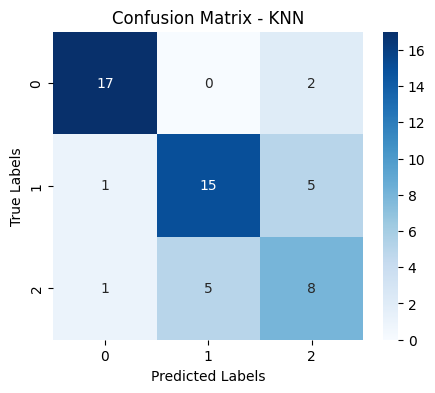

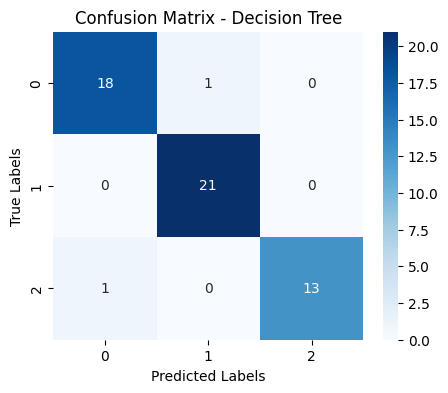

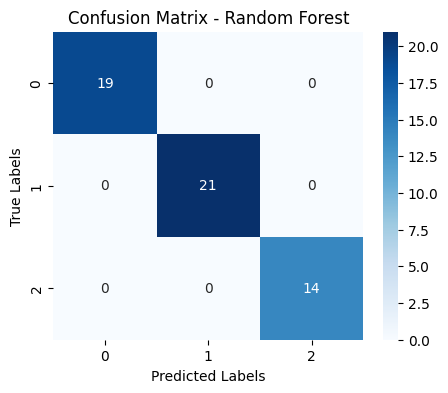

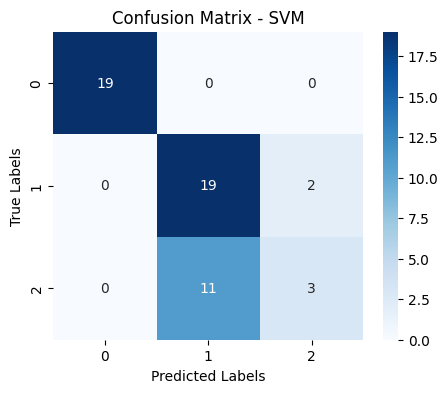

In [13]:
def plot_confusion_matrix(model, y_test, y_pred, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(knn, y_test, y_pred_knn, 'Confusion Matrix - KNN')
plot_confusion_matrix(dt, y_test, y_pred_dt, 'Confusion Matrix - Decision Tree')
plot_confusion_matrix(rf, y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_confusion_matrix(svm, y_test, y_pred_svm, 'Confusion Matrix - SVM')


### Confusion Matrix Breakdown for KNN, Decision Tree, Random Forest, and SVM

Here we are, staring at the **confusion matrices** for **KNN**, **Decision Tree**, **Random Forest**, and **SVM**—a visual representation of how our models handled classifying wines, or in some cases, how confused they got. Let’s dive into the chaos!

- **KNN Confusion Matrix**: KNN did alright with **Class 0**, but when it came to **Class 2**, it got lost. It’s like KNN went to the wine tasting but forgot what half the wines tasted like.

- **Decision Tree Confusion Matrix**: The Decision Tree was pretty much on point, with just one minor slip-up in **Class 2**. It’s like that person who’s almost perfect but trips on the last step of the staircase. 

- **Random Forest Confusion Matrix**: Perfect. Random Forest showed up to the wine-tasting party with a cheat sheet, nailing every classification. This model is basically the sommelier who can pinpoint the vineyard, year, and maybe even the winemaker with one sip.

- **SVM Confusion Matrix**: SVM started strong with **Class 0**, but when it came to **Class 2**, it was like the model got distracted drawing its hyperplanes and forgot it was actually supposed to classify the wine.

---

# Which Model is Better and Why?

Without a doubt, **Random Forest** takes the crown. It achieved **100% accuracy**, with no confusion at all. It performed like a seasoned sommelier, recognizing every wine without hesitation. Meanwhile, KNN and SVM fumbled with **Class 2**, and the Decision Tree did well but wasn’t quite as flawless as Random Forest. If you're looking for reliability in wine classification, **Random Forest** is the way to go!